<a href="https://colab.research.google.com/github/Christianib003/water-quality-model/blob/master/notebooks/%5BIrenee_Gisubizo_Dusingizimana%5D_water_quality_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FORMATIVE ASSIGNMENT II: WATER QUALITY MODEL

## 1. Introduction
**Assignment**: Building a Classification Model Using Neural Networks

**Objective:**
Develop a neural network-based classification model using a provided dataset, incorporating multiple optimization techniques and ensuring equitable group contribution.

**In this notebook, we will take the cleaned and imputed dataset and use it to train, test, and evaluate a deep learning model**:

The key steps we'll cover are:
1. Loading the preprocessed (imputed) dataset.
2. Separating features and the target variable.
3. Splitting the dataset into three distinct portions: training, validation, and testing sets. This is crucial for robust model development and evaluation.
4. Applying feature scaling (StandardScaler) correctly after the split to prevent data leakage.

**Note:** The data cleaning and imputation steps were performed in a previous notebook.
If you'd like to review that process, please refer to: [Data Preprocessing Notebook](data_preprocessing.ipynb).

**Model Details**


| Engineer Name     | Regularizer | Optimizer | Early Stopping  | Dropout Rate | Learning Rate |
| ----------------- | ---------------------------- | --------- | ------------------------------------------------ | ------------ | ------------- |
| Irenee Dusingizimana | L2           | AdamW      | Patience=10                 | 0.01        | 0.0001       |



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import AdamW

In [ ]:
# Mount Google Drive if using Google Colab
from google.colab import drive # Import the necessary library for Google Colab
drive.mount('/content/drive') # Mount your Google Drive

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/imputed_water_potability_data.csv')
data.head()

Mounted at /content/drive


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#### Plotting the data

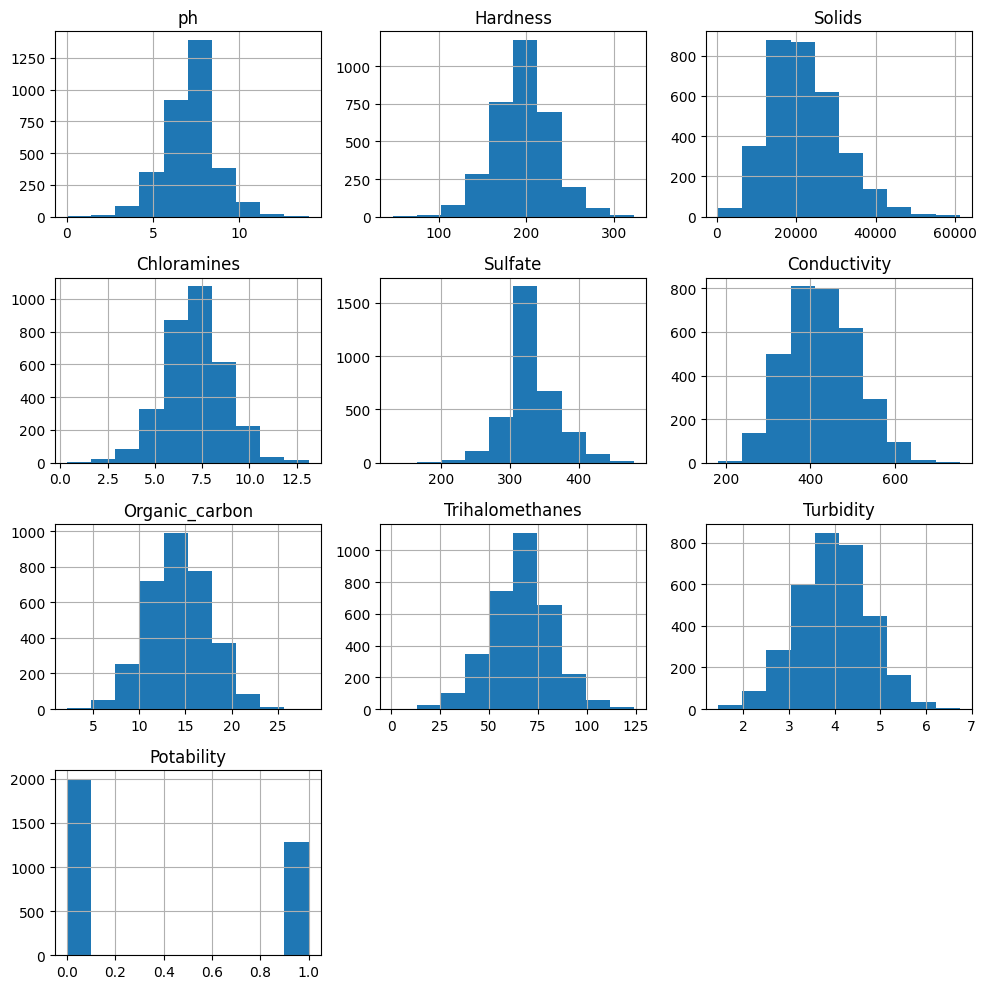

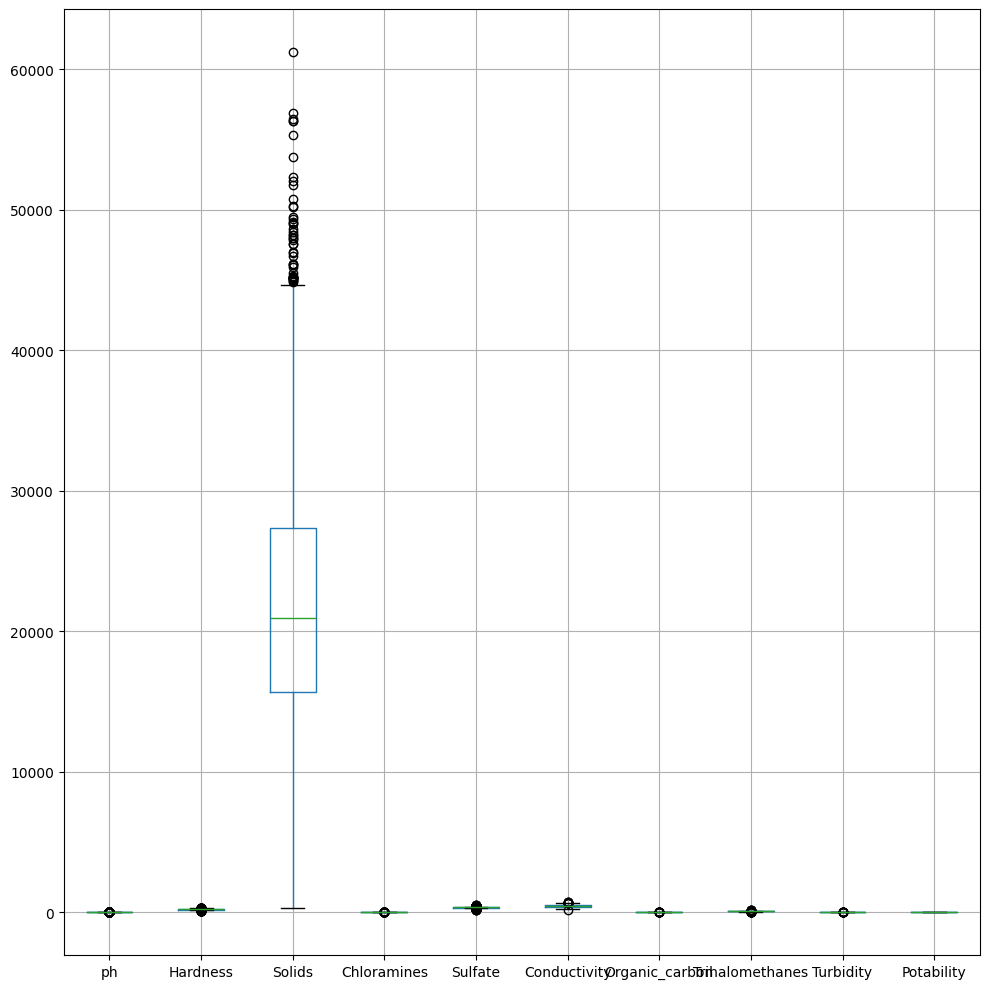

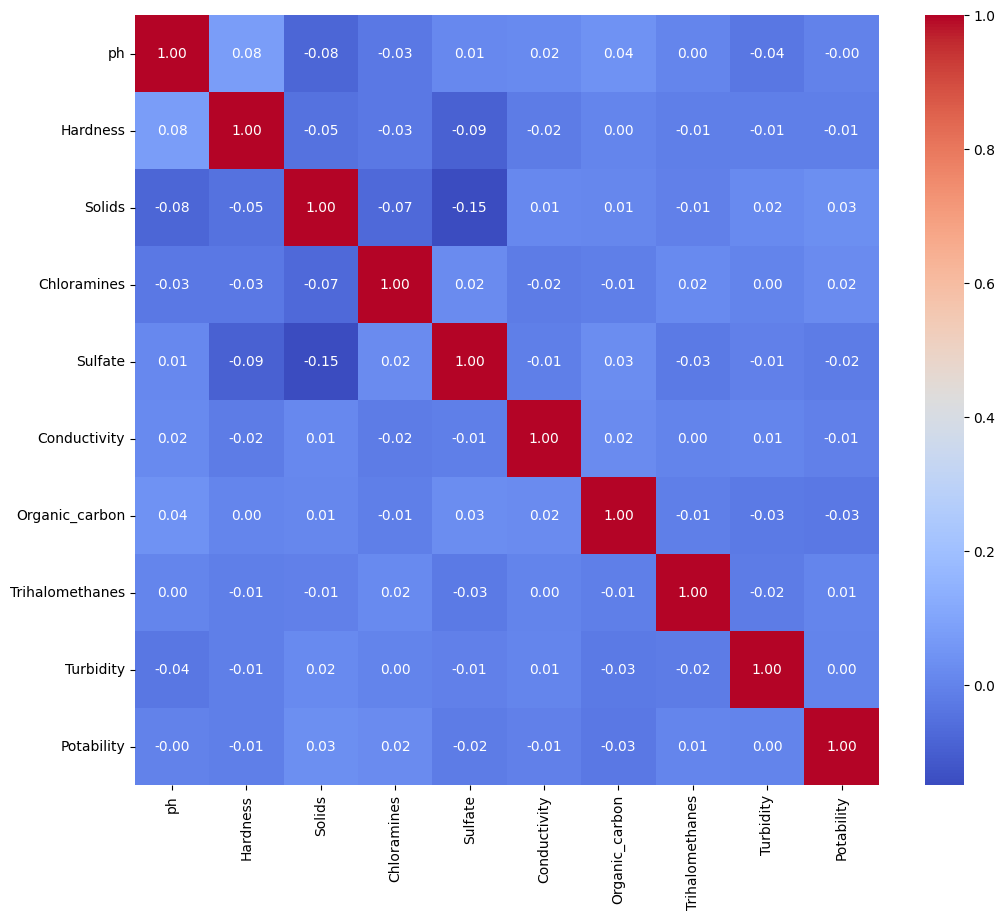

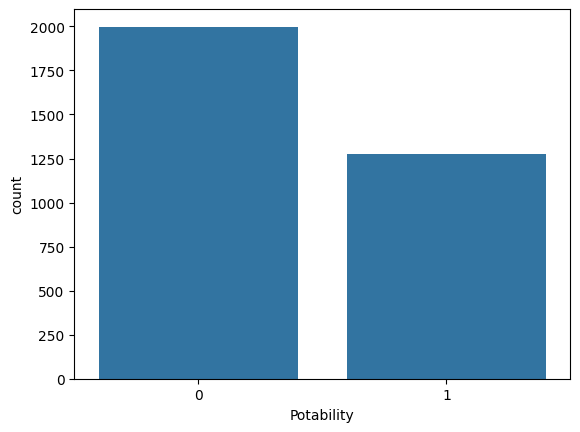

In [ ]:
# plot the data

data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

data.boxplot(figsize=(10, 10))
plt.tight_layout()
plt.show()

import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

sns.countplot(x='Potability', data=data)
plt.show()

In [ ]:
# show how many missing values and handle them by filling in the mean

print(data.isnull().sum())
data = data.fillna(data.mean())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [ ]:
print(data.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [ ]:
# generate 2d classification dataset

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [ ]:
# generate 2d classification dataset

X= data.drop('Potability', axis=1)
y = data['Potability']

In [ ]:
# display input shape

print("Input shape: ", X.shape)

Input shape:  (3276, 9)


In [ ]:
# split data

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2620, 9)
X_test shape: (656, 9)
y_train shape: (2620,)
y_test shape: (656,)


#### Defining my model

In [10]:
# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(1, activation='sigmoid'))


# Compile with AdamW optimizer
optimizer = AdamW(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

#### Starting the training process

In [12]:
# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6062 - loss: 1549.6951 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6050 - val_loss: 683.8643 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5803 - loss: 504.0901 - precision: 0.3815 - recall: 0.0903 - val_accuracy: 0.5382 - val_loss: 3.0595 - val_precision: 0.3793 - val_recall: 0.2657
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5356 - loss: 223.4270 - precision: 0.4127 - recall: 0.4145 - val_accuracy: 0.6050 - val_loss: 20.2866 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5314 - loss: 188.7368 - precision: 0.3994 - recall: 0.3830 - val_accuracy: 0.4160 - val_loss: 12.9780 - val_precision: 0.3971 - val_recall: 0.9227
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4999 - loss: 198.9263 - precision: 0.3671 - recall: 0.3657 - 

Test Loss: 2.9042
Test Accuracy: 0.5762
Test Precision: 0.4023
Test Recall: 0.2869


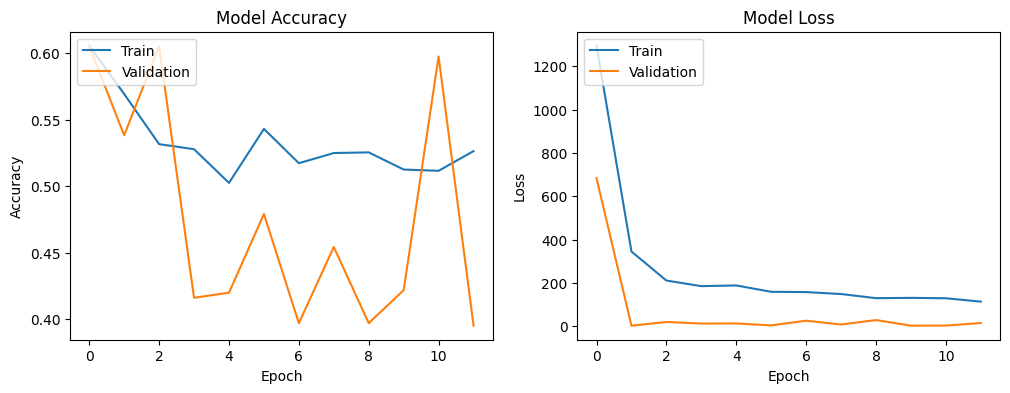

In [13]:
#  Evaluate the model with all returned metrics
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")


# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


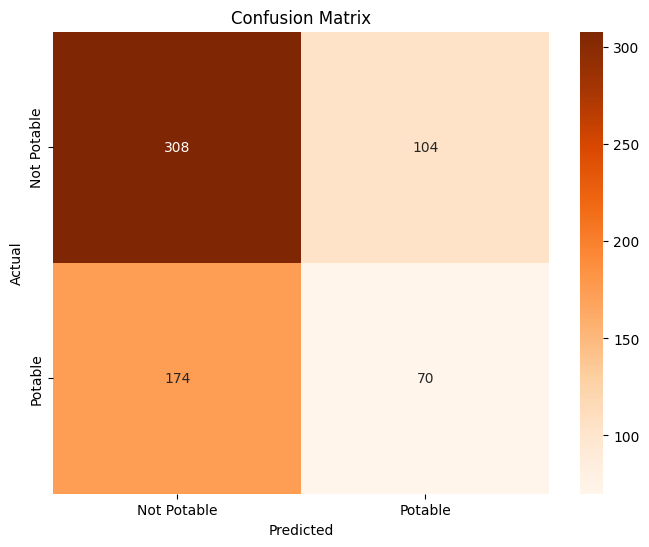


Classification Report:
              precision    recall  f1-score   support

 Not Potable       0.64      0.75      0.69       412
     Potable       0.40      0.29      0.33       244

    accuracy                           0.58       656
   macro avg       0.52      0.52      0.51       656
weighted avg       0.55      0.58      0.56       656



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Potable', 'Potable']))